In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/Shareddrives/Data Science Project'

/content/drive/Shareddrives/Data Science Project


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("data/df.csv")
df[['Month','Day', 'Year']] = df['Date'].astype(str).str.split("/", 3, expand=True)
df = df.drop(['Date'], axis=1)
df = df[['Month','Day', 'Year', 'TempAvgF',	'WindAvgMPH', 'PrecipiationTotalInches','Population','SCENT']]
df

,Month,Day,Year,TempAvgF,WindAvgMPH,PrecipiationTotalInches,Population,SCENT
0,12,21,2013,60,4.0,0.46,4366621,5000.812101
1,12,22,2013,48,6.0,0.00,4366621,5400.039845
2,12,23,2013,45,3.0,0.00,4366621,6487.734510
3,12,24,2013,46,4.0,0.00,4366621,6304.645047
4,12,25,2013,50,2.0,0.00,4366621,5551.250908
...,...,...,...,...,...,...,...,...
1314,07,27,2017,89,5.0,0.00,4819608,8952.474693
1315,07,28,2017,91,5.0,0.00,4819608,9029.304552
1316,07,29,2017,92,4.0,0.00,4819608,9095.338784
1317,07,30,2017,93,4.0,0.00,4819608,9056.192376


In [ ]:
df.isnull().sum()

Month                      0
Day                        0
Year                       0
TempAvgF                   0
WindAvgMPH                 0
PrecipiationTotalInches    0
Population                 0
SCENT                      0
dtype: int64

In [ ]:
X = df.drop(['SCENT'], axis=1)
y = df['SCENT']

In [ ]:
cat_ft = ['Month', 'Day', 'Year']
num_ft = (list(X._get_numeric_data().columns))

In [ ]:
def prepend(list, str):  
    # Using format()
    str += '{0}'
    list = [str.format(i) for i in list]
    return(list)

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# define example
data = X['Month']
values = array(data)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)


In [ ]:
months = pd.DataFrame(onehot_encoded)

In [ ]:
months.columns = (prepend(list(months.columns), 'month'))

In [ ]:
# OHE Days
data = X['Day']
values = array(data)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
days = pd.DataFrame(onehot_encoded)

In [ ]:
days.columns = (prepend(list(days.columns), 'day'))

In [ ]:
# OHE Year
data = X['Year']
values = array(data)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

years = pd.DataFrame(onehot_encoded)

In [ ]:
renamed_years = (prepend(list(years.columns), 'year'))
years.columns = renamed_years

In [ ]:
X = pd.concat([X, months,], axis=1)
X = pd.concat([X, years,], axis=1)
X = pd.concat([X, days,], axis=1)

In [ ]:
X = X.drop(columns=['Month', 'Day', 'Year',])
X.head()

,TempAvgF,WindAvgMPH,PrecipiationTotalInches,Population,month0,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,year0,year1,year2,year3,year4,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,day10,day11,day12,day13,day14,day15,day16,day17,day18,day19,day20,day21,day22,day23,day24,day25,day26,day27,day28,day29,day30
0,60,4.0,0.46,4366621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48,6.0,0.00,4366621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,45,3.0,0.00,4366621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46,4.0,0.00,4366621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50,2.0,0.00,4366621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#SKIPP
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler()
X_train = standard_X.fit_transform(X_train)
X_test = standard_X.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(model.score(X_test, y_test))

0.6554612847606314


In [ ]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
# evaluate predictions

In [ ]:
model.score(X_test, y_test)

ValueError: ignored

In [ ]:
y_pred
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
pip install catboost

     |████████████████████████████████| 67.3MB 66kB/s 


In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=200,
                          learning_rate=1,
                          depth=2)
# Fit model
model.fit(X_train, y_train)
# Get predictions
preds = model.predict(X_test)
print(model.score(X_test, y_test))

0:	learn: 648.9914962	total: 390us	remaining: 77.6ms
1:	learn: 515.8398183	total: 623us	remaining: 61.8ms
2:	learn: 489.9965336	total: 848us	remaining: 55.7ms
3:	learn: 457.3028540	total: 1.24ms	remaining: 61ms
4:	learn: 442.7745986	total: 1.72ms	remaining: 67.1ms
5:	learn: 426.5101286	total: 1.95ms	remaining: 63.1ms
6:	learn: 395.7703587	total: 2.19ms	remaining: 60.2ms
7:	learn: 380.2181600	total: 2.42ms	remaining: 58ms
8:	learn: 361.4374318	total: 2.64ms	remaining: 56.1ms
9:	learn: 350.5502819	total: 3.04ms	remaining: 57.9ms
10:	learn: 342.2385782	total: 3.44ms	remaining: 59.2ms
11:	learn: 335.7257155	total: 3.73ms	remaining: 58.5ms
12:	learn: 326.8616986	total: 3.99ms	remaining: 57.4ms
13:	learn: 323.0848212	total: 4.26ms	remaining: 56.6ms
14:	learn: 318.2315321	total: 4.67ms	remaining: 57.6ms
15:	learn: 314.5826376	total: 4.94ms	remaining: 56.8ms
16:	learn: 312.1937693	total: 5.29ms	remaining: 56.9ms
17:	learn: 307.7330123	total: 6.99ms	remaining: 70.7ms
18:	learn: 303.5828022	tota

In [ ]:
preds[314]

6712.25632570181

In [ ]:
model.get_feature_importance()

array([9.25417164e+01, 1.05189269e+00, 8.25473859e-01, 8.45396223e-01,
       6.40369438e-02, 4.14615081e-01, 6.79441002e-01, 5.30088069e-01,
       1.57352161e-01, 1.39951965e-01, 2.56105116e-01, 2.09086559e-01,
       3.67885882e-02, 6.33845898e-02, 7.48263583e-01, 1.59867003e-01,
       0.00000000e+00, 9.04765380e-02, 2.41861344e-01, 1.93224787e-02,
       0.00000000e+00, 7.25750043e-03, 1.03036728e-02, 3.26700505e-02,
       4.87982451e-02, 2.14217129e-02, 1.01603024e-02, 3.16327580e-02,
       5.10957658e-03, 3.09788137e-02, 1.92831201e-02, 2.54878772e-02,
       7.88517567e-02, 4.47279446e-03, 5.03078382e-02, 4.80287562e-02,
       3.02805028e-02, 3.56693828e-02, 4.85512008e-02, 1.74502592e-02,
       1.74679414e-02, 3.07255482e-02, 0.00000000e+00, 2.43560978e-02,
       2.71955127e-02, 4.24794858e-02, 4.93983312e-02, 3.47273118e-02,
       3.35681207e-02, 2.17974523e-02, 7.37970850e-02, 1.26508243e-02])

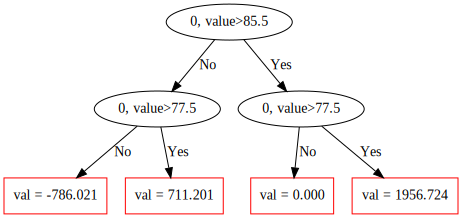

In [141]:
model.plot_tree(tree_idx=0)

In [143]:
y_pred

array([5229.19801046, 7197.95894114, 8870.93488807, 5687.69533633,
       7220.95164585, 5049.50290716, 7124.44115986, 8451.54111715,
       5736.98801474, 6003.58088481, 6575.44768697, 6617.6502027 ,
       4997.5076709 , 5347.68031262, 5147.73780107, 7088.68766307,
       6483.74963368, 5645.75766034, 8705.95435741, 5828.79349261,
       5633.21608535, 5205.95842525, 8136.8465892 , 5412.66993395,
       6003.56668357, 5792.49256037, 5839.53275178, 7057.00336785,
       8083.82947621, 5080.67165561, 5183.4161427 , 8697.36971467,
       5772.50170772, 5380.34929255, 5137.72978942, 7554.47909097,
       5765.55185425, 5443.46070531, 5013.81167715, 7215.51849743,
       5219.56459921, 5973.65060192, 5584.48257053, 8615.32797389,
       8045.0307601 , 5598.26666073, 4989.29092549, 5252.8671455 ,
       6007.23069955, 5623.60235678, 6175.17717943, 5993.03471111,
       8225.14403613, 4983.79530031, 5889.73898998, 8625.83507371,
       7303.842947  , 5335.30906631, 5144.95785001, 4998.87366

In [ ]:
X_train

,Month,Day,Year,TempAvgF,WindAvgMPH,PrecipiationTotalInches,Population
1093,12,18,2016,32,12.0,0.00,4692037
1166,03,01,2017,64,8.0,0.00,4819608
1309,07,22,2017,90,6.0,0.00,4819608
528,06,02,2015,79,2.0,0.00,4596570
3,12,24,2013,46,4.0,0.00,4366621
...,...,...,...,...,...,...,...
1095,12,20,2016,47,2.0,0.00,4692037
1130,01,24,2017,67,7.0,0.00,4819608
1294,07,07,2017,87,3.0,0.02,4819608
860,04,29,2016,80,7.0,0.00,4692037


In [181]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=3, random_state=42, n_estimators=110)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

In [182]:
from sklearn import tree


In [183]:
y_pred[314]

6408.533598869629

In [184]:
regr.score(X_test, y_test)

0.8883196660714302

[Text(837.0, 1426.95, 'X[0] <= 80.5\nmse = 1498930.884\nsamples = 558\nvalue = 6435.384'),
 Text(418.5, 1019.25, 'X[0] <= 40.5\nmse = 534614.654\nsamples = 392\nvalue = 5784.356'),
 Text(209.25, 611.55, 'X[0] <= 36.5\nmse = 368909.53\nsamples = 17\nvalue = 7883.87'),
 Text(104.625, 203.8499999999999, 'mse = 60433.415\nsamples = 9\nvalue = 8360.992'),
 Text(313.875, 203.8499999999999, 'mse = 127638.983\nsamples = 8\nvalue = 7300.721'),
 Text(627.75, 611.55, 'X[0] <= 74.5\nmse = 387802.676\nsamples = 375\nvalue = 5714.138'),
 Text(523.125, 203.8499999999999, 'mse = 276600.535\nsamples = 282\nvalue = 5508.245'),
 Text(732.375, 203.8499999999999, 'mse = 194524.659\nsamples = 93\nvalue = 6351.56'),
 Text(1255.5, 1019.25, 'X[0] <= 86.5\nmse = 454295.737\nsamples = 166\nvalue = 7953.63'),
 Text(1046.25, 611.55, 'X[0] <= 83.5\nmse = 193666.867\nsamples = 98\nvalue = 7555.299'),
 Text(941.625, 203.8499999999999, 'mse = 101423.295\nsamples = 40\nvalue = 7165.803'),
 Text(1150.875, 203.8499999999

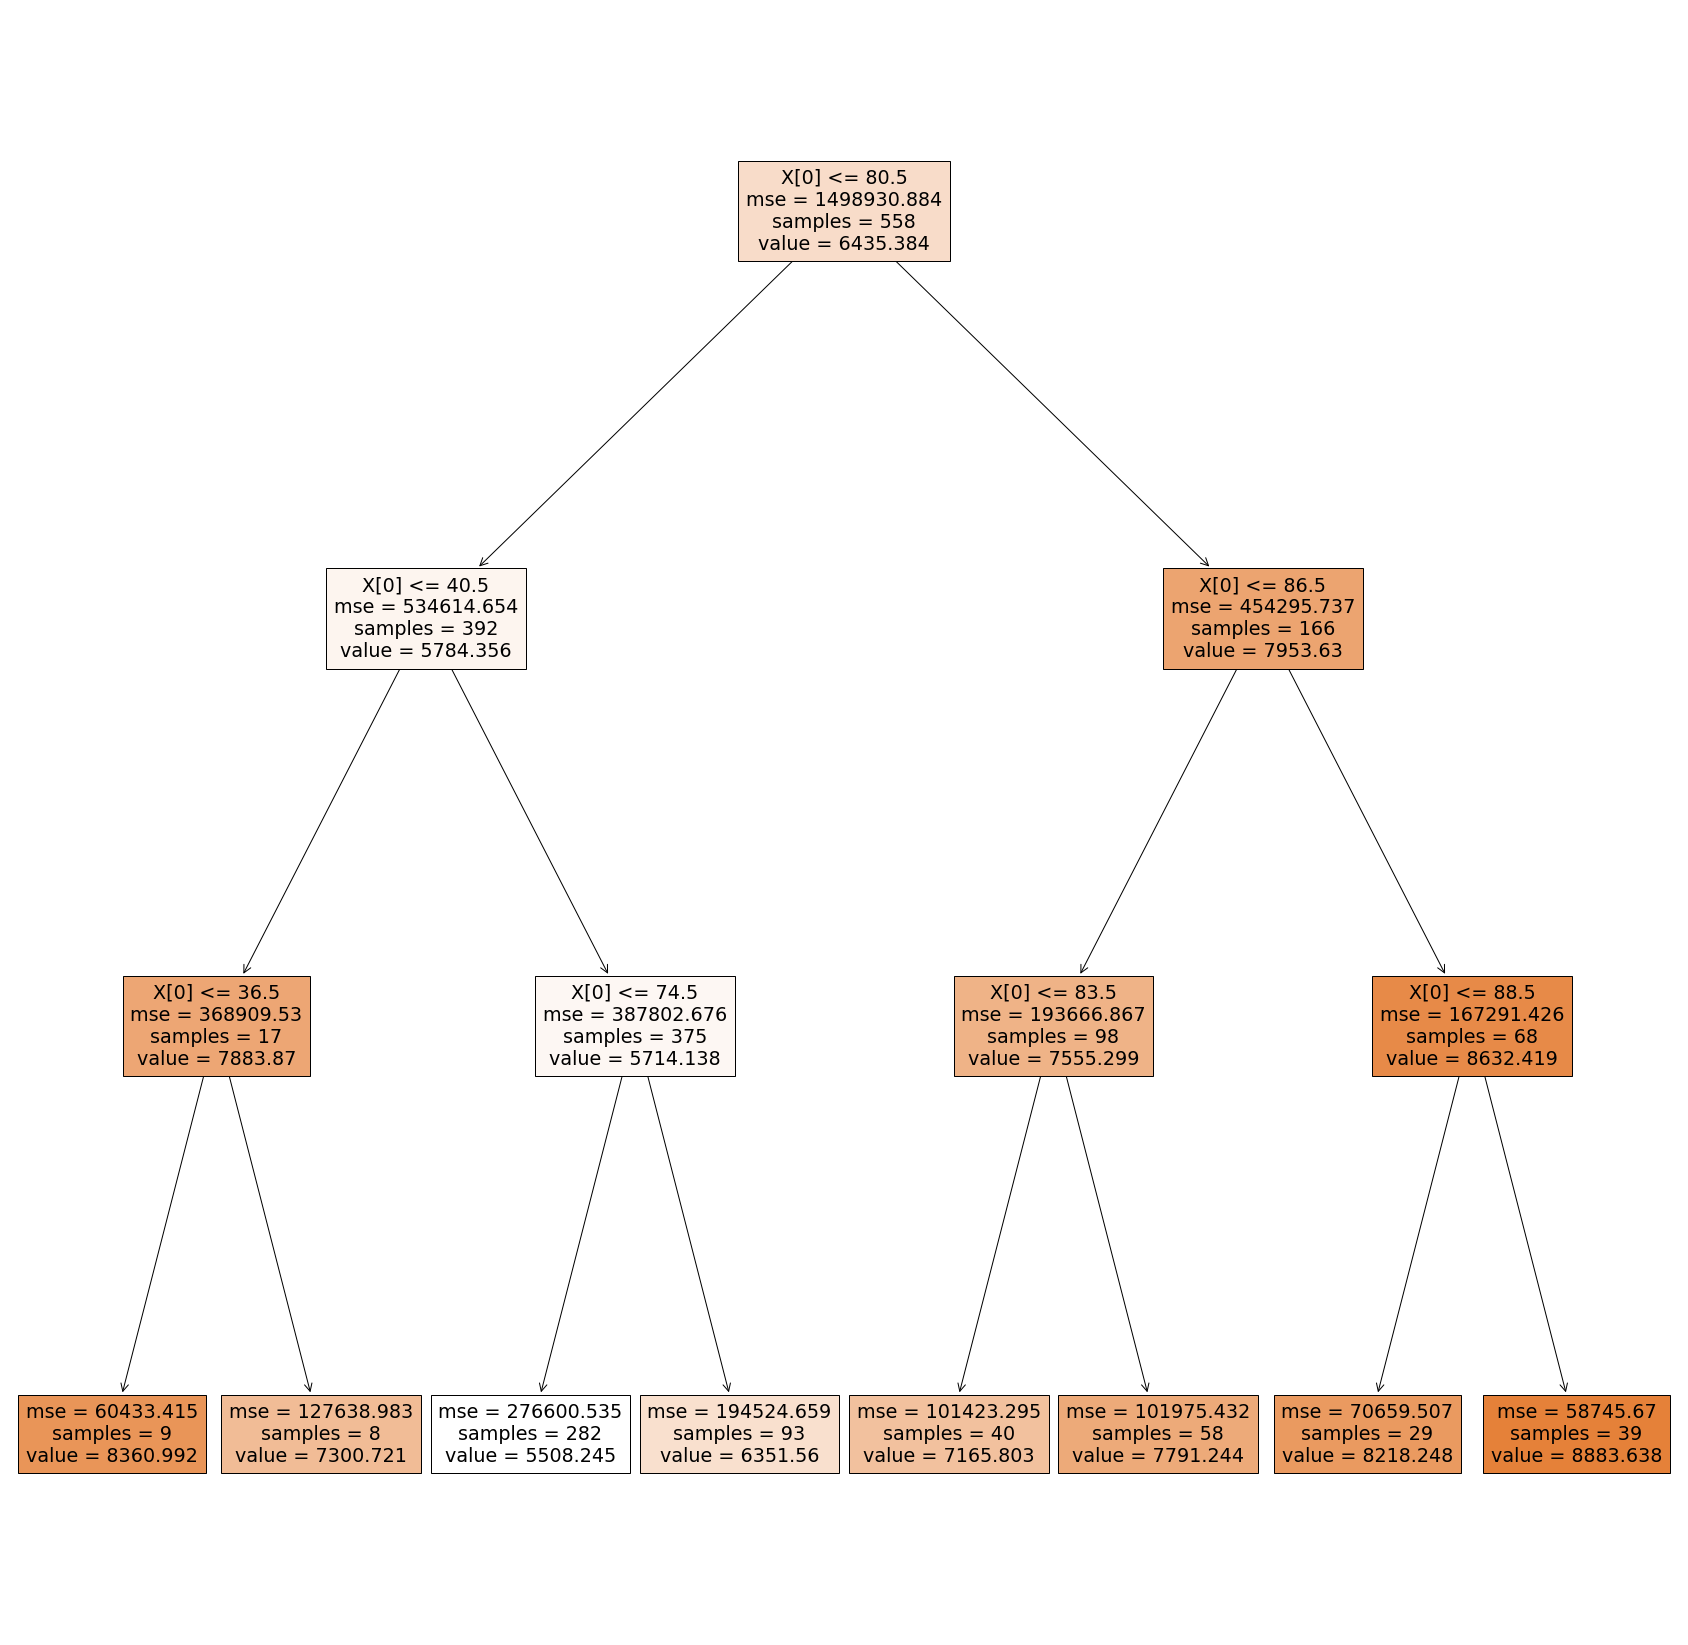

In [185]:
plt.figure(figsize=(30,30))
tree.plot_tree(regr.estimators_[0], filled=True)

In [166]:
y_pred

array([5448.11506275, 7177.38063223, 8779.99127072, 5448.11506275,
       7177.38063223, 5448.11506275, 7177.38063223, 8342.0495968 ,
       5476.54734326, 5530.98910293, 6357.85888201, 6357.85888201,
       5448.11506275, 5448.11506275, 5448.11506275, 7218.31874934,
       6357.85888201, 5461.29024818, 8779.99127072, 6057.07937402,
       5448.11506275, 5448.11506275, 8146.00109866, 5448.11506275,
       6279.17885972, 5448.11506275, 5461.29024818, 6921.75033187,
       8029.64536996, 5448.11506275, 5448.11506275, 8779.99127072,
       5448.11506275, 5461.29024818, 5448.11506275, 7635.57977364,
       6279.17885972, 5448.11506275, 5448.11506275, 7224.71643854,
       5448.11506275, 6279.17885972, 5448.11506275, 8776.74363209,
       6954.82234189, 5448.11506275, 5448.11506275, 5448.11506275,
       5575.06675806, 5448.11506275, 5607.59777948, 6279.17885972,
       8146.00109866, 5448.11506275, 5530.98910293, 8776.74363209,
       7177.38063223, 5448.11506275, 5448.11506275, 5448.11506

In [ ]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor(num_leaves = 20, max_depth=5)
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

In [ ]:
gbm.score(X_test, y_test)

0.9330842377062655

In [ ]:
from sklearn.metrics import accuracy_score
#accuracy_score(y_test, y_pred)
gbm.score(X_test, y_test)

0.9197269996232386

In [ ]:
gbm.feature_importances_

array([1122,  460,  274,  283,   57,   40,   53,   42,   40,   45,   48,
         51,   40,   29,   26,   40,    0,   15,   45,   45,    0,    2,
          0,   17,    9,   14,   29,    7,    5,    4,    7,    9,   30,
          0,    2,    8,   11,    0,    9,    0,    4,    9,    0,   17,
          8,    0,    8,   15,    4,    4,   11,    0])

Feature: 0, Score: 1476.00000
Feature: 1, Score: 696.00000
Feature: 2, Score: 359.00000
Feature: 3, Score: 463.00000


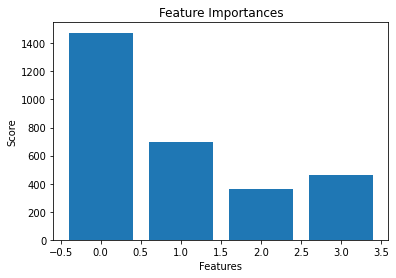

In [ ]:
from matplotlib import pyplot

importance = array([1476,  696,  359,  463])
#importance = gbm.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.title('Feature Importances')
pyplot.xlabel('Features')
pyplot.ylabel('Score')
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
#temp, wind, precip, population

In [ ]:
y_pred[314]

6831.64595750497

In [165]:
gbm.create_tree_digraph()

AttributeError: ignored